In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%pip install --quiet git+https://github.com/Schwarzam/lsdb@server-test

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install --quiet splusdata --upgrade

Note: you may need to restart the kernel to use updated packages.


In [3]:
import splusdata
import lsdb

# Explore the HiPSCat catalogs and plot sky maps
from hipscat.catalog import Catalog
from hipscat.inspection import plot_pixels

## Checking for all S-PLUS available hipscats

In [4]:
splusdata.get_hipscats()

{'dr4_vacs': {'qso_z': {'hipscats': ['qso_z'], 'margins': ['qso_z_2arcsec']},
  'photozs': {'hipscats': ['photozs'], 'margins': ['photozs_2arcsec']},
  'calib_flag': {'hipscats': ['calib_flag'],
   'margins': ['calib_flag_2arcsec']},
  'sqg': {'hipscats': ['sqg'], 'margins': ['sqg_2arcsec']}},
 'sdr1': {'hipscats': ['shorts'], 'margins': ['shorts_2arcsec']},
 'dr4': {'hipscats': ['single', 'dual', 'psf'],
  'margins': ['psf_2arcsec', 'single_2arcsec', 'dual_2arcsec']}}

## Exploring splus dual's hipscat

In [5]:
print("Searching for a SPLUS HiPSCat catalogs...")
res = splusdata.get_hipscats("dr4/dual")[0]
print(res)

Searching for a SPLUS HiPSCat catalogs...
['https://splus.cloud/HIPS/catalogs/dr4/dual', 'https://splus.cloud/HIPS/catalogs/dr4/dual_2arcsec']


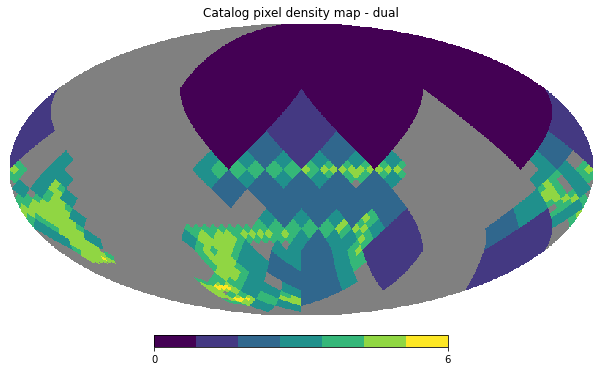

In [6]:
# Read the HiPSCat catalog metadata, it does not load any data, just healpix pixels and other metadata
dual_splus_hipscat_catalog = Catalog.read_from_hipscat(splusdata.get_hipscats("dr4/dual")[0][0])
plot_pixels(dual_splus_hipscat_catalog)

### Creating cluster client (optional)

This dask client is optional, but it can be useful to monitor the progress of the computation.

In [7]:
from dask.distributed import Client

client = Client(n_workers=10, memory_limit="8GB")
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 10
Total threads: 10,Total memory: 74.51 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:57316,Workers: 10
Dashboard: http://127.0.0.1:8787/status,Total threads: 10
Started: Just now,Total memory: 74.51 GiB
Comm: tcp://127.0.0.1:57340,Total threads: 1
Dashboard: http://127.0.0.1:57343/status,Memory: 7.45 GiB
Nanny: tcp://127.0.0.1:57319,


### Exploring the data 

Lets print the columns of the data and the first few rows.

## Now here is where lsdb shines

Lets do a cone search around the coordinates of the galaxy and plot the results.

In [12]:
dual_splus_margin = lsdb.read_hipscat(splusdata.get_hipscats("dr4/dual")[0][1])
dual_splus_hips = lsdb.read_hipscat(
    splusdata.get_hipscats("dr4/dual")[0][0],
    margin_cache=dual_splus_margin,
    columns = ["ID", "RA", "DEC", # Try messing with the columns
            "r_auto", "e_r_auto",
            "g_auto", "e_g_auto",
            "i_auto", "e_i_auto",
            "z_auto", "e_z_auto",
            "u_auto", "e_u_auto",
            "J0378_auto", "e_J0378_auto",
            "J0395_auto", "e_J0395_auto",
            "J0410_auto", "e_J0410_auto",
            "J0430_auto", "e_J0430_auto",
            "J0515_auto", "e_J0515_auto",
            "J0660_auto", "e_J0660_auto",
            "J0861_auto", "e_J0861_auto",
    ],
    filters=["r_auto < 14"], # Try messing with this query
    dtype_backend="numpy_nullable"
)

res = dual_splus_hips.cone_search(
    0.1,
    0.1,
    5 * 3600
)

dual_cat = res.compute()

In [13]:
dual_cat

,ID,RA,DEC,r_auto,e_r_auto,g_auto,e_g_auto,i_auto,e_i_auto,z_auto,...,J0410_auto,e_J0410_auto,J0430_auto,e_J0430_auto,J0515_auto,e_J0515_auto,J0660_auto,e_J0660_auto,J0861_auto,e_J0861_auto
0,DR4_3_STRIPE82-0003_0001068,1.471216,-1.346668,13.901836,0.001225,14.799687,0.001956,13.565275,0.001098,13.415218,...,15.692736,0.008157,15.452905,0.006523,14.683434,0.003818,13.82113,0.001404,13.470127,0.001893
1,DR4_3_STRIPE82-0003_0002677,1.372322,-1.318654,11.935268,0.000475,12.599166,0.000671,11.704461,0.000519,11.610344,...,13.197812,0.00205,13.094857,0.001831,12.375271,0.001189,11.881254,0.000551,11.646481,0.00075
2,DR4_3_STRIPE82-0003_0001394,1.260432,-1.345229,13.308126,0.000912,13.902827,0.001248,13.159301,0.000896,13.125454,...,14.475191,0.003982,14.323302,0.003429,13.706692,0.002274,13.278003,0.001068,13.146515,0.001586
3,DR4_3_STRIPE82-0003_0002233,1.281982,-1.321958,13.292292,0.000901,14.055149,0.00134,13.027679,0.000836,12.907902,...,14.803529,0.004782,14.604598,0.003986,13.854696,0.002447,13.222335,0.001036,12.940901,0.00142
4,DR4_3_STRIPE82-0003_0004807,1.396255,-1.270763,11.616728,0.249998,11.568103,0.000481,11.171503,0.069154,11.222666,...,11.893466,0.001091,11.817597,0.000993,11.402954,0.00075,11.167146,0.000393,11.099735,0.000577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,DR4_3_STRIPE82-0004_0031401,1.310737,1.391429,12.918739,0.000777,13.685965,0.001168,12.655148,0.000713,12.557542,...,14.442499,0.004039,14.264097,0.003487,13.595619,0.002274,12.842223,0.00091,12.601795,0.00117
313,DR4_3_STRIPE82-0170_0036126,358.571545,1.219864,12.486865,0.000615,12.580663,0.000697,12.505444,0.000641,12.453873,...,12.70192,0.001745,12.636324,0.00162,12.355984,0.001195,12.41201,0.000681,12.292835,0.000997
314,DR4_3_STRIPE82-0170_0048499,358.53218,1.293605,12.35498,0.000582,12.77145,0.00077,12.200764,0.000558,12.057802,...,13.450133,0.002535,13.299417,0.002254,12.583818,0.001343,12.184726,0.000616,11.946651,0.000844
315,DR4_3_STRIPE82-0170_0043414,358.507365,1.399523,13.749058,0.001151,14.128517,0.001488,13.644385,0.001144,13.648451,...,14.460399,0.004238,14.398629,0.003922,13.961993,0.002633,13.755808,0.001318,13.665736,0.002002


## Crossmatching two tables

In [14]:
sqg_splus_margin = lsdb.read_hipscat(splusdata.get_hipscats("dr4/sqg")[0][1])
sqg_splus_hips = lsdb.read_hipscat(splusdata.get_hipscats("dr4/sqg")[0][0], margin_cache=sqg_splus_margin)

In [15]:
## res is the result of the cone search in the dual catalog
crossmatch = res.crossmatch(sqg_splus_hips, radius_arcsec=2, suffixes=("_dual", "_sqg"))
table = crossmatch.compute()

In [16]:
table

,ID_dual,RA_dual,DEC_dual,r_auto_dual,e_r_auto_dual,g_auto_dual,e_g_auto_dual,i_auto_dual,e_i_auto_dual,z_auto_dual,...,DEC_sqg,CLASS_sqg,model_flag_sqg,PROB_QSO_sqg,PROB_STAR_sqg,PROB_GAL_sqg,Norder_sqg,Dir_sqg,Npix_sqg,_dist_arcsec
_hipscat_index,,,,,,,,,,,,,,,,,,,,,
0,DR4_3_STRIPE82-0003_0001068,1.471216,-1.346668,13.901836,0.001225,14.799687,0.001956,13.565275,0.001098,13.415218,...,-1.346668,1.0,0,0.01,0.97,0.02,2,0,67,0.000282
1,DR4_3_STRIPE82-0003_0002677,1.372322,-1.318654,11.935268,0.000475,12.599166,0.000671,11.704461,0.000519,11.610344,...,-1.318654,1.0,0,0.05,0.72,0.23,2,0,67,0.000282
2,DR4_3_STRIPE82-0003_0001394,1.260432,-1.345229,13.308126,0.000912,13.902827,0.001248,13.159301,0.000896,13.125454,...,-1.345229,1.0,0,0.01,0.96,0.03,2,0,67,0.000282
3,DR4_3_STRIPE82-0003_0002233,1.281982,-1.321958,13.292292,0.000901,14.055149,0.00134,13.027679,0.000836,12.907902,...,-1.321958,1.0,0,0.07,0.9,0.03,2,0,67,0.000282
4,DR4_3_STRIPE82-0003_0004807,1.396255,-1.270763,11.616728,0.249998,11.568103,0.000481,11.171503,0.069154,11.222666,...,-1.270763,1.0,0,0.0,0.55,0.45,2,0,67,0.000282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,DR4_3_STRIPE82-0004_0031401,1.310737,1.391429,12.918739,0.000777,13.685965,0.001168,12.655148,0.000713,12.557542,...,1.391429,1.0,0,0.04,0.8,0.16,1,0,19,0.000282
313,DR4_3_STRIPE82-0170_0036126,358.571545,1.219864,12.486865,0.000615,12.580663,0.000697,12.505444,0.000641,12.453873,...,1.219864,2.0,0,0.0,0.46,0.54,1,0,19,0.0
314,DR4_3_STRIPE82-0170_0048499,358.53218,1.293605,12.35498,0.000582,12.77145,0.00077,12.200764,0.000558,12.057802,...,1.293605,2.0,0,0.0,0.36,0.64,1,0,19,0.0
